In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
import pandas as pd
import numpy as np

In [24]:
np.random.seed(12345)

In [25]:
data = pd.read_csv('GOOG3.csv',parse_dates=True)

In [26]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-27,82.683998,82.750000,81.287498,81.716499,81.716499,37232000
1,2020-08-28,81.674500,82.358498,81.537498,82.220497,82.220497,29980000
2,2020-08-31,82.394501,82.398247,81.515503,81.709000,81.709000,36468000
3,2020-09-01,81.831497,83.286499,81.611000,83.035500,83.035500,36506000
4,2020-09-02,83.688751,86.658997,83.316498,86.414001,86.414001,50224000


In [27]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
499,2022-08-22,116.099998,116.500000,114.669998,115.070000,115.070000,19316000
500,2022-08-23,114.320000,115.930000,114.300003,114.769997,114.769997,14390700
501,2022-08-24,114.449997,115.717003,113.779999,114.699997,114.699997,16051200
502,2022-08-25,115.150002,117.779999,115.050003,117.699997,117.699997,14874700
503,2022-08-26,115.809998,116.449997,111.250000,111.300003,111.300003,31590470


In [28]:
data.shape

(504, 7)

In [29]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [30]:
data['Date'] = pd.to_datetime(data['Date'],format="%Y-%m-%d")

In [31]:
df_close = data[['Date','Adj Close']]

In [32]:
df_close.columns = ['Date','y']

In [33]:
df_close.sort_values(by='Date', inplace=True)

In [34]:
df_close.head(10)

,Date,y
0,2020-08-27,81.716499
1,2020-08-28,82.220497
2,2020-08-31,81.709000
3,2020-09-01,83.035500
4,2020-09-02,86.414001
5,2020-09-03,82.092003
6,2020-09-04,79.552002
7,2020-09-08,76.619499
8,2020-09-09,77.848000
9,2020-09-10,76.600998


In [35]:
df_close.tail(5)

,Date,y
499,2022-08-22,115.070000
500,2022-08-23,114.769997
501,2022-08-24,114.699997
502,2022-08-25,117.699997
503,2022-08-26,111.300003


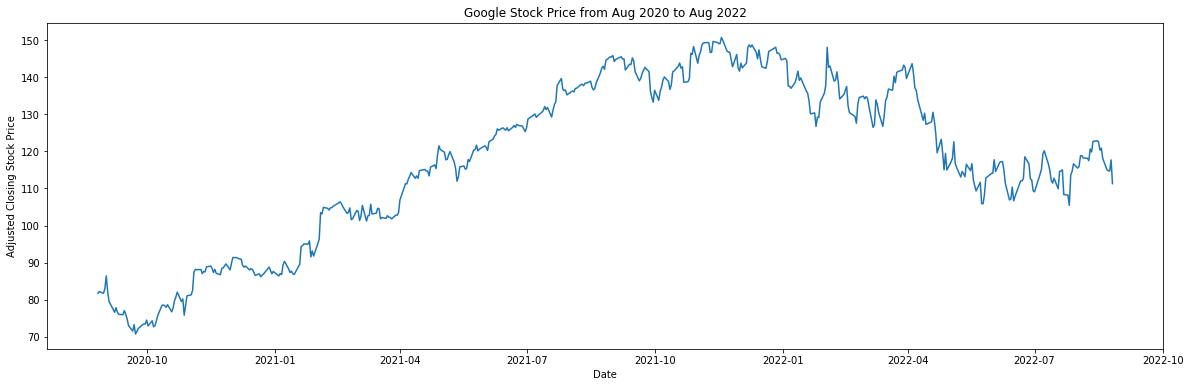

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,6))
sns.lineplot(data=df_close, x='Date',y='y')
plt.title('Google Stock Price from Aug 2020 to Aug 2022')
plt.ylabel('Adjusted Closing Stock Price')
plt.show()

In [ ]:
# 1,2,3,4,5,6,7,8,9,10

# 1,2,3,4 -> 5
# 2,3,4,5 -> 6
# 3,4,5,6 -> 7



In [37]:
window_size = 45
for i in range(window_size):
    df_close['y'+str(i+1)] = df_close['y'].shift(i+1)

In [38]:
df_close.iloc[0:5,:]

,Date,y,y1,y2,y3,y4,y5,y6,y7,y8,...,y36,y37,y38,y39,y40,y41,y42,y43,y44,y45
0,2020-08-27,81.716499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-08-28,82.220497,81.716499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-08-31,81.709000,82.220497,81.716499,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-09-01,83.035500,81.709000,82.220497,81.716499,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-09-02,86.414001,83.035500,81.709000,82.220497,81.716499,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df_close.iloc[45:50,:]

,Date,y,y1,y2,y3,y4,y5,y6,y7,y8,...,y36,y37,y38,y39,y40,y41,y42,y43,y44,y45
45,2020-10-30,81.050499,78.362000,75.831001,80.212997,79.522499,82.050003,80.766502,79.665497,77.796501,...,76.600998,77.848000,76.619499,79.552002,82.092003,86.414001,83.035500,81.709000,82.220497,81.716499
46,2020-11-02,81.301498,81.050499,78.362000,75.831001,80.212997,79.522499,82.050003,80.766502,79.665497,...,76.036003,76.600998,77.848000,76.619499,79.552002,82.092003,86.414001,83.035500,81.709000,82.220497
47,2020-11-03,82.510498,81.301498,81.050499,78.362000,75.831001,80.212997,79.522499,82.050003,80.766502,...,75.963997,76.036003,76.600998,77.848000,76.619499,79.552002,82.092003,86.414001,83.035500,81.709000
48,2020-11-04,87.456497,82.510498,81.301498,81.050499,78.362000,75.831001,80.212997,79.522499,82.050003,...,77.071999,75.963997,76.036003,76.600998,77.848000,76.619499,79.552002,82.092003,86.414001,83.035500
49,2020-11-05,88.168503,87.456497,82.510498,81.301498,81.050499,78.362000,75.831001,80.212997,79.522499,...,76.044998,77.071999,75.963997,76.036003,76.600998,77.848000,76.619499,79.552002,82.092003,86.414001


In [40]:
df_close.shape

(504, 47)

In [41]:
df_close.dropna(axis=0, inplace=True)

In [42]:
df_close.shape

(459, 47)

In [43]:
df_train = df_close[df_close['Date'] <= pd.to_datetime('2022-08-14')]
df_test = df_close[df_close['Date'] > pd.to_datetime('2022-08-14')]

In [44]:
print(f" Training shape {df_train.shape} Testing Shape {df_test.shape}")

 Training shape (449, 47) Testing Shape (10, 47)


In [45]:
df_train.tail()

,Date,y,y1,y2,y3,y4,y5,y6,y7,y8,...,y36,y37,y38,y39,y40,y41,y42,y43,y44,y45
489,2022-08-08,118.139999,118.220001,118.870003,118.779999,115.900002,115.480003,116.639999,114.589996,113.599998,...,110.390503,107.194000,106.876503,111.427498,114.917999,117.237999,117.229500,117.010498,114.564003,117.746002
490,2022-08-09,117.500000,118.139999,118.220001,118.870003,118.779999,115.900002,115.480003,116.639999,114.589996,...,106.636002,110.390503,107.194000,106.876503,111.427498,114.917999,117.237999,117.229500,117.010498,114.564003
491,2022-08-10,120.650002,117.500000,118.139999,118.220001,118.870003,118.779999,115.900002,115.480003,116.639999,...,107.865501,106.636002,110.390503,107.194000,106.876503,111.427498,114.917999,117.237999,117.229500,117.010498
492,2022-08-11,119.820000,120.650002,117.500000,118.139999,118.220001,118.870003,118.779999,115.900002,115.480003,...,112.014999,107.865501,106.636002,110.390503,107.194000,106.876503,111.427498,114.917999,117.237999,117.229500
493,2022-08-12,122.650002,119.820000,120.650002,117.500000,118.139999,118.220001,118.870003,118.779999,115.900002,...,112.033997,112.014999,107.865501,106.636002,110.390503,107.194000,106.876503,111.427498,114.917999,117.237999


In [46]:
df_test.head(10)

,Date,y,y1,y2,y3,y4,y5,y6,y7,y8,...,y36,y37,y38,y39,y40,y41,y42,y43,y44,y45
494,2022-08-15,122.879997,122.650002,119.820000,120.650002,117.500000,118.139999,118.220001,118.870003,118.779999,...,112.684502,112.033997,112.014999,107.865501,106.636002,110.390503,107.194000,106.876503,111.427498,114.917999
495,2022-08-16,122.510002,122.879997,122.650002,119.820000,120.650002,117.500000,118.139999,118.220001,118.870003,...,118.538002,112.684502,112.033997,112.014999,107.865501,106.636002,110.390503,107.194000,106.876503,111.427498
496,2022-08-17,120.320000,122.510002,122.879997,122.650002,119.820000,120.650002,117.500000,118.139999,118.220001,...,116.622498,118.538002,112.684502,112.033997,112.014999,107.865501,106.636002,110.390503,107.194000,106.876503
497,2022-08-18,120.860001,120.320000,122.510002,122.879997,122.650002,119.820000,120.650002,117.500000,118.139999,...,112.571503,116.622498,118.538002,112.684502,112.033997,112.014999,107.865501,106.636002,110.390503,107.194000
498,2022-08-19,118.120003,120.860001,120.320000,122.510002,122.879997,122.650002,119.820000,120.650002,117.500000,...,112.256500,112.571503,116.622498,118.538002,112.684502,112.033997,112.014999,107.865501,106.636002,110.390503
499,2022-08-22,115.070000,118.120003,120.860001,120.320000,122.510002,122.879997,122.650002,119.820000,120.650002,...,109.372498,112.256500,112.571503,116.622498,118.538002,112.684502,112.033997,112.014999,107.865501,106.636002
500,2022-08-23,114.769997,115.070000,118.120003,120.860001,120.320000,122.510002,122.879997,122.650002,119.820000,...,109.081001,109.372498,112.256500,112.571503,116.622498,118.538002,112.684502,112.033997,112.014999,107.865501
501,2022-08-24,114.699997,114.769997,115.070000,118.120003,120.860001,120.320000,122.510002,122.879997,122.650002,...,113.887001,109.081001,109.372498,112.256500,112.571503,116.622498,118.538002,112.684502,112.033997,112.014999
502,2022-08-25,117.699997,114.699997,114.769997,115.070000,118.120003,120.860001,120.320000,122.510002,122.879997,...,115.213501,113.887001,109.081001,109.372498,112.256500,112.571503,116.622498,118.538002,112.684502,112.033997
503,2022-08-26,111.300003,117.699997,114.699997,114.769997,115.070000,118.120003,120.860001,120.320000,122.510002,...,119.306000,115.213501,113.887001,109.081001,109.372498,112.256500,112.571503,116.622498,118.538002,112.684502


In [47]:
X_train = df_train.drop(['Date','y'],axis=1)
y_train = df_train['y']

X_test = df_test.drop(['Date','y'],axis=1)
y_test = df_test['y']

In [48]:
print(f" X Train Shape {X_train.shape} and X Test shape {X_test.shape}")

 X Train Shape (449, 45) and X Test shape (10, 45)


In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [51]:
tf.random.set_seed(12345)

In [52]:
X_train.shape

(449, 45)

In [53]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [54]:
print(X_train.shape)
print(X_test.shape)

(449, 45, 1)
(10, 45, 1)


In [55]:
model = Sequential()

In [56]:
model.add(LSTM(128, 
               activation='relu',
               return_sequences = True,
               input_shape=(None,1)))

In [57]:
model.add(LSTM(128, 
               activation = 'relu'))

In [58]:
model.add(Dense(units = 1, 
                activation = 'linear'))

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 128)         66560     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(optimizer='adam', 
              loss='huber' , 
              metrics = 'mse')

In [ ]:
# Mape = Avg(Abs(Actual - Predicted)/Actual)
# 1 - MAPE = Accuracy

In [61]:
cp = tf.keras.callbacks.ModelCheckpoint('GoogModel.h5',
                                        monitor='val_mse', 
                                        save_weights=True, 
                                        save_best_only = True,
                                        verbose=1)

In [62]:
model.fit(X_train, 
          y_train,
          validation_data = (X_test, y_test),
          epochs = 200, 
          callbacks = [cp])

Epoch 1/200
15/15 [==============================] - ETA: 0s - loss: 118.1691 - mse: 14705.0781
Epoch 1: val_mse improved from inf to 13695.05469, saving model to GoogModel.h5
15/15 [==============================] - 10s 148ms/step - loss: 118.1691 - mse: 14705.0781 - val_loss: 116.4694 - val_mse: 13695.0547
Epoch 2/200
15/15 [==============================] - ETA: 0s - loss: 107.4777 - mse: 13119.9980
Epoch 2: val_mse did not improve from 13695.05469
15/15 [==============================] - 2s 119ms/step - loss: 107.4777 - mse: 13119.9980 - val_loss: 116.6774 - val_mse: 13743.6328
Epoch 3/200
14/15 [===========================>..] - ETA: 0s - loss: 103.3176 - mse: 13334.8779
Epoch 3: val_mse did not improve from 13695.05469
15/15 [==============================] - 2s 119ms/step - loss: 103.3953 - mse: 13348.0352 - val_loss: 116.6033 - val_mse: 13726.3066
Epoch 4/200
15/15 [==============================] - ETA: 0s - loss: 83.9910 - mse: 8829.9961
Epoch 4: val_mse improved from 13695.0

In [63]:
new_model = tf.keras.models.load_model('GoogModel.h5')

In [64]:
y_tr_pred = new_model.predict(X_train)

In [65]:
y_ts_pred = new_model.predict(X_test)

In [66]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
# MAPE = np.mean(np.abs(actual - predicted)/actual)

In [67]:
print(f"Training set accuracy : {np.round(100 - mean_absolute_percentage_error(y_true = y_train, y_pred = y_tr_pred)*100,2)}%")

Training set accuracy : 98.36%


In [68]:
print(f"Test set accuracy : {np.round(100 - mean_absolute_percentage_error(y_true = y_test, y_pred = y_ts_pred)*100,2)}%")

Test set accuracy : 98.37%


In [69]:
df1 = df_train[['Date','y']]
df1['Pred'] = y_tr_pred

In [70]:
df1.head()

,Date,y,Pred
45,2020-10-30,81.050499,82.882881
46,2020-11-02,81.301498,82.660728
47,2020-11-03,82.510498,83.449669
48,2020-11-04,87.456497,84.437737
49,2020-11-05,88.168503,85.317879


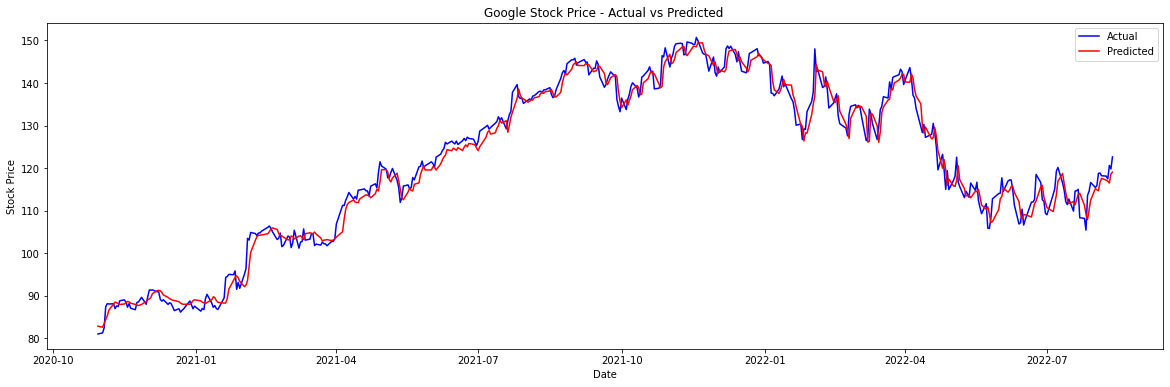

In [71]:
plt.figure(figsize = (20,6))
plt.plot(df1['Date'], df1['y'],color='blue', label='Actual')
plt.plot(df1['Date'], df1['Pred'],color='red', label='Predicted')
plt.title("Google Stock Price - Actual vs Predicted " )
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [72]:
new_test_df = df_test[['Date','y']].copy()

In [73]:
new_test_df['yhat'] = y_ts_pred

In [74]:
new_test_df

,Date,y,yhat
494,2022-08-15,122.879997,120.787514
495,2022-08-16,122.510002,121.446251
496,2022-08-17,120.320000,121.191460
497,2022-08-18,120.860001,119.649162
498,2022-08-19,118.120003,119.817703
499,2022-08-22,115.070000,117.933563
500,2022-08-23,114.769997,115.154236
501,2022-08-24,114.699997,114.115196
502,2022-08-25,117.699997,114.043098
503,2022-08-26,111.300003,115.909950


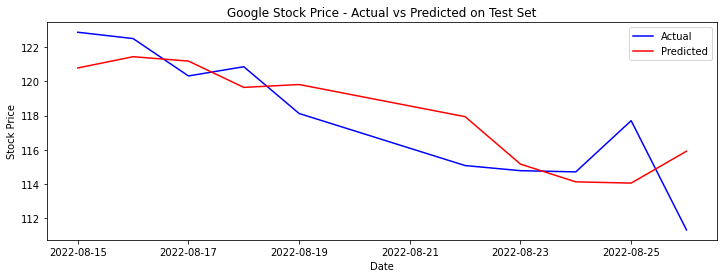

In [75]:
plt.figure(figsize = (12,4))
plt.plot(new_test_df['Date'], new_test_df['y'],color='blue', label='Actual')
plt.plot(new_test_df['Date'], new_test_df['yhat'],color='red', label='Predicted')
plt.title("Google Stock Price - Actual vs Predicted on Test Set" )
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()